## How to Approach Machine Learning Projects

![](https://i.imgur.com/kKdAALX.png)


Approach

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings.


Let's install and import the required libraries.

In [ ]:
#restart the kernel after installation
!pip install numpy pandas-profiling matplotlib plotly seaborn --quiet

In [ ]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?
10. ...


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

### Working with Real World Data

Whenever possible, try to work with real world datasets. [Kaggle](https://kaggle.com/datasets) is a great source for real-world data.

> **Question To My Self**: Go through the dataset description for [Rossmann Store Sales Prediction](https://www.kaggle.com/c/rossmann-store-sales) and answer the above questions.
>

> **Future work need to Done**: Go through the dataset description for the [Breast Cancer Identification dataset]( https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) and answer the above questions.
>


Let's save our work before continuing.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)):

<img src="https://i.imgur.com/VbVFAsg.png" width="640">




> **QMS**: What type of problem is store sales prediction: https://www.kaggle.com/c/rossmann-store-sales ?

- predecting the continious value which is regression type (under supervised learning)

> **QMS**: What type of problem is mall customer segmentation: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

- It is a unsupervised ml where we want to cluster the different groups

### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

> **EXERCISE**: What are the appropriate loss function and evaluation metric for store sales prediction: https://www.kaggle.com/c/rossmann-store-sales ?

RMSE but in the computation they given RMSPE oot Mean Square Percentage Error (RMSPE).

> **EXERCISE**: What are the appropriate loss function and evaluation metric for breast cancer identification: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data ?

as it is classfication Best one is cross entropy loss

Let's save our work before continuing.

## Step 3 - Download, clean & explore the data and create new features

<img src="https://i.imgur.com/0f7foe7.png" width="640">

Okay, let’s carefully break down the **problem statement** step by step as per your required structure.

---

### **Step 1: What is given and what is asked**

* **Given Information**:

  * Rossmann operates **over 3,000 drug stores** across 7 European countries.
  * In Germany, there are **1,115 stores** where sales data is available.
  * Store sales are affected by multiple factors:

    * Promotions
    * Competitor presence
    * School holidays
    * State holidays
    * Seasonality (time of year)
    * Locality (location-specific factors)

* **Current Situation**:

  * Individual store managers are manually predicting sales **6 weeks in advance**.
  * These manual forecasts vary in **accuracy** from manager to manager.

* **Task**:

  * Build a **robust prediction model** that can forecast **daily sales for the next 6 weeks** for all 1,115 stores in Germany.

**Step 1 Summary**: The problem is to predict **future daily sales** of Rossmann stores in Germany using historical data and influencing factors, instead of relying on manual predictions by managers.

---

### **Step 2: Why is this problem important?**

* **For Managers**:
  Accurate forecasts help them plan **staff schedules** efficiently → right number of workers at the right time.
* **For Stores**:
  Better forecasts lead to **higher productivity**, reduced costs, and improved customer satisfaction.
* **For the Business**:
  Provides a **scalable, data-driven solution** instead of subjective manual forecasting.

**Step 2 Summary**: Accurate sales prediction is critical for resource planning, improving productivity, and ensuring better customer service.

---

### **Step 3: Nature of the Problem**

* This is a **time series forecasting problem** combined with **regression**, since the output is a **continuous numerical value** (sales amount).
* It requires considering:

  * **Temporal factors** (time-related patterns like weekdays, holidays, seasons).
  * **Store-specific factors** (location, competition, promotions).
  * **External influences** (school/state holidays, economic activity).

**Step 3 Summary**: The problem is a **machine learning regression + time-series forecasting challenge**, requiring modeling of temporal and external factors affecting sales.

---

### **Final Summary of Problem Statement**

Rossmann wants to replace manual and inconsistent sales forecasting with a **machine learning model** that predicts **daily sales for the next 6 weeks** across **1,115 German stores**. The model must account for factors like promotions, competition, holidays, seasonality, and locality. Accurate forecasting will help optimize staff scheduling, boost productivity, and improve customer focus.

---

👉 Would you like me to also explain **the dataset features** (what kind of input data is provided) to make this problem statement even clearer?


### Downloading Data

There may be different sources to get the data:

* CSV files
* SQL databases
* Raw File URLs
* Kaggle datasets
* Google Drive
* Dropbox
* etc.

Identify the right tool/library to get the data.

For the Rossmann Store Sales prediction dataset, we'll use the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/rossmann-store-sales/rules) before executing the following cell.


In [ ]:
import requests
import os

# Replace with the direct URL to the raw zip file content on GitHub
# You can usually get this by going to the zip file on GitHub, clicking "Raw", and copying the URL
zip_file_url = 'https://github.com/Harish-lvrk/ml-from-scratch/raw/main/datasets/rossmann-store-sales.zip'
local_zip_path = '/content/downloaded_file.zip'

try:
    # Download the zip file
    response = requests.get(zip_file_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(local_zip_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    print(f"Zip file downloaded to {local_zip_path}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading zip file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Zip file downloaded to /content/downloaded_file.zip


In [ ]:
import zipfile

# Use the path where the file was downloaded by the previous cell
local_zip_path = '/content/downloaded_file.zip'
extract_path = '/content/rossmann-store-sales'

try:
    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_path, exist_ok=True)

    # Open and extract the zip file
    with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Zip file extracted to {extract_path}")

    # List the files in the extracted directory
    print("\nFiles in the zip file:")
    for root, dirs, files in os.walk(extract_path):
        for name in files:
            print(os.path.join(root, name))
        for name in dirs:
            print(os.path.join(root, name))

except FileNotFoundError:
    print(f"Error: Zip file not found at {local_zip_path}. Please ensure the file path is correct and the previous cell ran successfully.")
except Exception as e:
    print(f"Error extracting zip file: {e}")

Zip file extracted to /content/rossmann-store-sales

Files in the zip file:
/content/rossmann-store-sales/test.csv
/content/rossmann-store-sales/train.csv
/content/rossmann-store-sales/store.csv
/content/rossmann-store-sales/sample_submission.csv


In [ ]:
os.listdir('rossmann-store-sales')

['test.csv', 'train.csv', 'store.csv', 'sample_submission.csv']

In [ ]:
os.listdir('/content/rossmann-store-sales')

['test.csv', 'train.csv', 'store.csv', 'sample_submission.csv']

In [ ]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)

This code snippet uses the pandas library to read a CSV file named train.csv located in the ./rossmann-store-sales/ directory. The low_memory=False argument is used to ensure that pandas does not try to optimize memory usage by reading the file in chunks, which can sometimes lead to mixed data types in columns. The data from the CSV is then loaded into a pandas DataFrame named ross_df.

In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


This output from `store_df.info()` provides a concise summary of the `store_df` DataFrame:

*   **`<class 'pandas.core.frame.DataFrame'>`**: Confirms that `store_df` is a pandas DataFrame.
*   **`RangeIndex: 1115 entries, 0 to 1114`**: Indicates that the DataFrame has 1115 rows, indexed from 0 to 1114. This aligns with the information that there are 1115 stores.
*   **`Data columns (total 10 columns)`**: Shows that the DataFrame has a total of 10 columns.
*   **`#   Column                     Non-Null Count  Dtype`**: This is the header for the list of columns.
    *   `Column`: The name of the column.
    *   `Non-Null Count`: The number of non-missing values in each column.
    *   `Dtype`: The data type of the column.
*   **Column List**: Each row after the header details a specific column:
    *   `Store`: Integer type (`int64`), no missing values (1115 non-null).
    *   `StoreType`: Object type (`object`), no missing values (1115 non-null). This usually indicates strings or mixed types.
    *   `Assortment`: Object type (`object`), no missing values (1115 non-null). Similar to `StoreType`, likely strings.
    *   `CompetitionDistance`: Float type (`float64`), has missing values (1112 non-null out of 1115).
    *   `CompetitionOpenSinceMonth`: Float type (`float64`), has many missing values (761 non-null out of 1115).
    *   `CompetitionOpenSinceYear`: Float type (`float64`), has many missing values (761 non-null out of 1115).
    *   `Promo2`: Integer type (`int64`), no missing values (1115 non-null).
    *   `Promo2SinceWeek`: Float type (`float64`), has many missing values (571 non-null out of 1115).
    *   `Promo2SinceYear`: Float type (`float64`), has many missing values (571 non-null out of 1115).
    *   `PromoInterval`: Object type (`object`), has many missing values (571 non-null out of 1115). Likely strings representing months.
*   **`dtypes: float64(5), int64(2), object(3)`**: Summarizes the number of columns per data type. There are 5 float columns, 2 integer columns, and 3 object columns.
*   **`memory usage: 87.2+ KB`**: Shows the memory usage of the DataFrame.

**Summary**: The `store_df` contains information about 1115 stores with 10 columns. Several columns related to competition and Promo2 have missing values that will need to be handled during data preprocessing.

 there is 1115 stores

### Step 1 — What is given & what needs to be done

**Given (files & fields):**

* `train.csv`: historical daily data **including** `Sales` for 1,115 German stores.
* `test.csv`: same structure **excluding** `Sales` (this is what we must forecast).
* `store.csv`: store-level metadata (e.g., `StoreType`, `Assortment`, competition & promo fields).
* `sample_submission.csv`: the required submission format.
* Important columns: `Id`, `Store`, `Date`, `Sales` (target), `Customers`, `Open`, `Promo`, `StateHoliday`, `SchoolHoliday`, `StoreType`, `Assortment`, `CompetitionDistance`, `CompetitionOpenSince*`, `Promo2`, `Promo2Since*`, `PromoInterval`.
* Note: Some stores were **temporarily closed for refurbishment** (affects `Open` / `Sales`).

**Task:**
Predict the **`Sales`** column for every row in the **test set** and submit as per `sample_submission.csv`.

**Step 1 summary:**
We have historical store-day data + store metadata. We must forecast daily **Sales** for the test rows and submit predictions keyed by `Id`.

---

# Step 2 — Understand the target & business rules

* **Target variable:** `Sales` (store’s daily turnover).
* **Closed days:** When `Open = 0`, stores are closed—**sales should be 0**. Test data can contain such days.
* **Refurbishments/closures:** These appear as stretches with `Open = 0`; treat the same as other closures unless evidence suggests otherwise.

**Step 2 summary:**
Predict a continuous number (`Sales`) per test row; set **0** when `Open = 0`. Handle refurbishment simply as closure unless stated otherwise.

---

# Step 3 — Data understanding (files & keys)

* Join **`train/test`** (by `Store`) ⇄ **`store.csv`** (one row per store).
* **Primary keys:**

  * Train: (`Store`, `Date`).
  * Test: `Id` identifies (`Store`, `Date`) pairs to predict.
* `Customers` exists only in **train**—helpful for modeling but **not** available in test.

**Step 3 summary:**
Merge store metadata into both train and test by `Store`. Treat `Id` as the submission key; `Customers` is train-only.

---

# Step 4 — Feature signals (what drives sales here)

* **Calendar:** `DayOfWeek`, month, year, week-of-year, end/beginning of month, proximity to holidays, seasonality.
* **Open/Promo:** `Open`, `Promo`, `Promo2`, `PromoInterval` (convert months to booleans per date), promo start age (days since `Promo2SinceYear/Week`).
* **Competition:** `CompetitionDistance` and “competition age” (days since `CompetitionOpenSinceYear/Month`).
* **Holidays:** `StateHoliday` (map a/b/c vs 0), `SchoolHoliday`.
* **Store identity:** `StoreType`, `Assortment`, and (optionally) store ID as categorical embedding/encoding.
* **Lags & moving stats:** per-store rolling means/medians of `Sales` (e.g., lag 7, 14, 28; rolling 7/28) to capture autocorrelation/seasonality.

**Step 4 summary:**
Engineer calendar, promo, competition, holiday, store-type, and lag/rolling features to capture store-specific seasonality & effects.

---

# Step 5 — Data cleaning & preprocessing

* **Missing values:**

  * `CompetitionOpenSince*` / `Promo2Since*` often missing → impute and/or set “age” to 0 when missing.
  * `CompetitionDistance` missing → impute (median by `StoreType` or large sentinel).
* **Categoricals:** Encode `StateHoliday`, `StoreType`, `Assortment`, `PromoInterval` (expanded to month flags).
* **Closed days in train:** Keep them (as 0 sales) or drop them **only** if your model would learn “Open → Sales=0” via a rule.
* **Outliers:** Check extreme spikes around promos/holidays; cap if needed.

**Step 5 summary:**
Impute competition/promo start info, encode categoricals, and decide how to treat closed days and outliers to stabilize learning.

---

# Step 6 — Validation strategy (very important)

* Use **time-aware validation** (no shuffling across time).
* Options:

  * **Holdout**: last 6–8 weeks of train as validation.
  * **TimeSeriesSplit**: rolling origin splits per date (optionally group by store to avoid leakage).
* **Metric:** Use a scale-sensitive metric; Kaggle commonly used RMSPE/SMAPE/RMSE—track at least RMSE/MAE; prioritize the comp’s metric if specified.

**Step 6 summary:**
Validate with **temporal splits** (e.g., last weeks or rolling splits) and monitor a scale-aware error metric close to the competition’s.

---

# Step 7 — Baselines & modeling plan

* **Rule baseline:** If `Open=0` ⇒ `Sales=0`; else use per-store weekday mean.
* **ML baselines:**

  * **Tree ensembles:** XGBoost/LightGBM/CatBoost (strong for tabular with heterogenous features).
  * **Linear models:** Ridge/Elastic Net with extensive feature engineering (weaker but fast).
  * **Global forecasting models:** Gradient boosting with per-store lags; or hybrid: per-store prophet/ARIMA for residuals.
* **What often works well here:** A **global gradient boosting model** (LGBM/XGB) with rich lags/rolling means + promo/competition ages + calendar effects.

**Step 7 summary:**
Start with a rules baseline, then move to a **global tree-boosting model** using lag/rolling & promo/competition features.

---

# Step 8 — Special handling for refurbishments & closures

* **Refurbishment:** Treat days with `Open=0` as **Sales=0**; do not propagate lags from closed days unless you build lags on **open-only** sequences.
* **Edge cases in test:** If `Open` is missing, infer from `DayOfWeek`, holidays, or typical open pattern; conservative choice is to predict 0 only when confidently closed.

**Step 8 summary:**
For refurbishments, predict 0 when closed and build lags carefully (open-only or with indicators) to avoid leakage/distortion.

---

# Step 9 — Submission construction

* Train model on the full training window (respecting time order).
* Generate predictions for **every row** in `test.csv`.
* Override predictions with **0** where `Open=0`.
* Create a CSV with columns: `Id`, `Sales`, matching `sample_submission.csv`.

**Step 9 summary:**
Produce predictions for all test rows, force 0 when closed, and export exactly in the sample submission format.

---

# Step 10 — Practical checklist (quick reference)

* [ ] Load `train`, `test`, `store`; merge on `Store`.
* [ ] Parse `Date`; add calendar features.
* [ ] Expand `PromoInterval`; compute promo/competition “age” features.
* [ ] Create per-store lags & rolling stats.
* [ ] Encode categoricals; impute missing.
* [ ] Time-based validation; tune LGBM/XGB.
* [ ] Predict test; set 0 where `Open=0`; export submission.

**Step 10 summary:**
Follow a clean pipeline from merge → features → temporal validation → tuned model → rule-adjusted predictions → submission.

---

## Final summary

You must forecast **daily `Sales`** for each (`Store`, `Date`) in the **test set** using historical data and store metadata. Handle **closures/refurbishments** by predicting **0** when `Open=0`. Build a time-aware modeling pipeline (feature engineering for calendar/promo/competition/lag effects, robust imputation & encoding), validate with **temporal splits**, train a strong **gradient boosting** model, and submit predictions in the exact `sample_submission.csv` format.



Let’s go step by step and explain each **column in plain English**, along with the **terminology meaning** so you can clearly understand what each feature represents.

---

### **Train/Test Data Columns**

* **Id**

  * **English meaning**: A unique number for each row in the **test set**. It identifies a specific (Store, Date) pair.
  * **Terminology**: Think of it as a "row number" for the test file that you’ll use when submitting predictions.

* **Store**

  * **English meaning**: A unique identifier for each Rossmann store.
  * **Terminology**: This is like a store code or store ID.

* **Sales** (target variable)

  * **English meaning**: The total turnover (money earned from selling products) on that particular day.
  * **Terminology**: This is the **value we want to predict**.

* **Customers**

  * **English meaning**: The number of people who shopped in the store on that day.
  * **Terminology**: Helpful as an explanatory variable, but not available in the test set.

* **Open**

  * **English meaning**: Whether the store was open that day (1 = open, 0 = closed).
  * **Terminology**: A binary flag. If it’s 0, then Sales = 0.

* **StateHoliday**

  * **English meaning**: Whether the day was a state/public holiday.
  * **Terminology values**:

    * `a` = public holiday
    * `b` = Easter holiday
    * `c` = Christmas holiday
    * `0` = not a holiday

* **SchoolHoliday**

  * **English meaning**: Whether schools were closed due to a holiday on that day.
  * **Terminology**: 1 = school closed, 0 = school open.

---

## **Store Metadata Columns (from store.csv)**

* **StoreType**

  * **English meaning**: The type/category of the store.
  * **Terminology values**: `a`, `b`, `c`, `d` → each letter represents a store format (like small, medium, large, or special type).

* **Assortment**

  * **English meaning**: The variety of products available in the store.
  * **Terminology values**:

    * `a` = basic assortment (fewer products)
    * `b` = extra assortment
    * `c` = extended assortment (wide product range)

* **CompetitionDistance**

  * **English meaning**: The distance (in meters) to the nearest competitor store.
  * **Terminology**: Smaller number = competitor is closer; bigger number = competitor is farther.

* **CompetitionOpenSince\[Month/Year]**

  * **English meaning**: The month and year when the nearest competitor started business.
  * **Terminology**: Helps estimate how long the competitor has been active.

* **Promo**

  * **English meaning**: Whether the store was running a special promotion on that day.
  * **Terminology**: 1 = promotion active, 0 = no promotion.

* **Promo2**

  * **English meaning**: Whether the store is part of a continuous, repeating promotion campaign.
  * **Terminology**: 1 = store participates in Promo2, 0 = not participating.

* **Promo2Since\[Year/Week]**

  * **English meaning**: The year and calendar week when the store first joined Promo2.
  * **Terminology**: A way to calculate how long the store has been in Promo2.

* **PromoInterval**

  * **English meaning**: The months when Promo2 starts again (repeats).
  * **Terminology example**: `"Feb,May,Aug,Nov"` → means every year, Promo2 starts fresh in February, May, August, and November.

---

✅ **Final Summary**:

* `Sales` = the money we want to forecast.
* `Open`, `Promo`, `StateHoliday`, `SchoolHoliday` = calendar & business activity indicators.
* `StoreType`, `Assortment`, `CompetitionDistance`, `Promo2` = store-specific characteristics.
* `Id` = row identifier in test, `Store` = store ID.
* Columns like `Promo2Since`, `PromoInterval`, `CompetitionOpenSince` describe **when promotions or competitor stores started**.

---



### 🔹 What is a Promotion in Retail?

A **promotion** is a **special marketing activity** done by the store to **increase customer traffic and boost sales**.
Examples of promotions in a drugstore like Rossmann:

* **Discounts**: “20% off on all cosmetics this week.”
* **Buy 1 Get 1 Free**: e.g., “Buy 1 shampoo, get 1 free.”
* **Loyalty/Points Offers**: “Double reward points this weekend.”
* **Coupons**: “Bring this coupon for ₹50 off.”
* **Holiday Campaigns**: “Christmas Sale” or “Back-to-School Offers.”

So whenever the column `Promo = 1`, it means that **on that day, that store was running one of these sales campaigns**.

---

## 🔹 Difference Between Promo and Promo2

* **Promo** (single-day/single-period):

  * A **short-term** promotion active only for that day or that week.
  * For example: A Rossmann store runs a **weekend discount** on skincare.
  * In the data, those specific dates will have `Promo = 1`.

* **Promo2** (continuous campaign):

  * A **long-term, recurring promotion program** that restarts in specific months every year.
  * Example: “Every February, May, August, and November, Rossmann launches a 4-week discount on seasonal products.”
  * In the data:

    * `Promo2 = 1` means the store participates.
    * `Promo2SinceYear/Week` tells when that store started participating.
    * `PromoInterval` tells **which months** the promotion runs again and again.

---

## 🔹 Why does this matter for Sales prediction?

* During **promotion days**, sales usually **increase** (more customers buy because of discounts or offers).
* If a store **participates in Promo2**, it may regularly see **sales boosts** during those months (Feb, May, Aug, Nov).
* Stores not in Promo2 (`Promo2=0`) rely only on normal short promotions (`Promo`).

---

✅ **Final Simple Example**:
Imagine Rossmann Store #101.

* On **March 5, 2015** → they ran a **“20% off hair products”** campaign.

  * Dataset: `Promo = 1` for that day.
* Store #101 also participates in a **Promo2 program** that runs in **Feb, May, Aug, Nov** every year.

  * Dataset: `Promo2 = 1`, `Promo2SinceYear = 2013`, `PromoInterval = Feb,May,Aug,Nov`.
  * So, every year in those months, sales go up due to the repeating big promotion.

---



In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


We can merge the two data frames to get a richer set of features for each row of the training set.

Here we adding the store data to the ross_df using the key values as the only mathced store id which is store here

In [ ]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_df.shape

(1017209, 18)

The dataset also contains a test set.

In [ ]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')

In [ ]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


> **EXERCISE**: Download the breast cancer identification dataset from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data .

### Cleaning Data

The first step is to check the column data types and identify if there are any null values.

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# Convert 'Date' to datetime objects
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

# Impute missing values in CompetitionDistance with the median
merged_df['CompetitionDistance'].fillna(merged_df['CompetitionDistance'].median(), inplace=True)
merged_test_df['CompetitionDistance'].fillna(merged_test_df['CompetitionDistance'].median(), inplace=True)

# Impute missing values in CompetitionOpenSinceMonth/Year and Promo2SinceWeek/Year with 0
merged_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']] = merged_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']].fillna(0)
merged_test_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']] = merged_test_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']].fillna(0)


# Fill missing PromoInterval values with 'None'
merged_df['PromoInterval'].fillna('None', inplace=True)
merged_test_df['PromoInterval'].fillna('None', inplace=True)

# Convert StateHoliday to string type to ensure consistency before encoding
merged_df['StateHoliday'] = merged_df['StateHoliday'].astype(str)
merged_test_df['StateHoliday'] = merged_test_df['StateHoliday'].astype(str)

# Handle the '0' state holiday which is represented as integer 0 in test and string '0' in train
merged_test_df.loc[merged_test_df['StateHoliday'] == '0', 'StateHoliday'] = '0'

print("Missing values after cleaning:")
print(merged_df.isnull().sum())
print("\nData types after cleaning:")
print(merged_df.dtypes)

/tmp/ipython-input-656348743.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['CompetitionDistance'].fillna(merged_df['CompetitionDistance'].median(), inplace=True)
/tmp/ipython-input-656348743.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

Missing values after cleaning:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Data types after cleaning:
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday     

It appears that there are no null values.

This code snippet calculates and displays descriptive statistics for the merged_df DataFrame.

merged_df.describe(): This pandas DataFrame method generates descriptive statistics of the numerical columns in the DataFrame. It includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
.T: This transposes the resulting table of statistics, making the columns (like count, mean, std, etc.) into rows and the index (the original DataFrame columns) into columns. This is often done for better readability when there are many columns.
round(..., 2): This rounds all the numerical values in the transposed statistics table to two decimal places.
In essence, this code provides a quick summary of the central tendency, dispersion, and shape of the distribution for each numerical column in your merged_df.

In [ ]:
round(merged_df.describe().T,2)

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056
CompetitionDistance,1017209.0,5422.03379,20.0,710.0,2330.0,6880.0,75860.0,7706.913044
CompetitionOpenSinceMonth,1017209.0,4.926878,0.0,0.0,4.0,9.0,12.0,4.283543


In [ ]:
merged_df.duplicated().sum()

np.int64(0)

Let's also parse the date column

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [ ]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [ ]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering




Let's study the distribution of the target "Sales" column

<Axes: xlabel='Sales', ylabel='Count'>

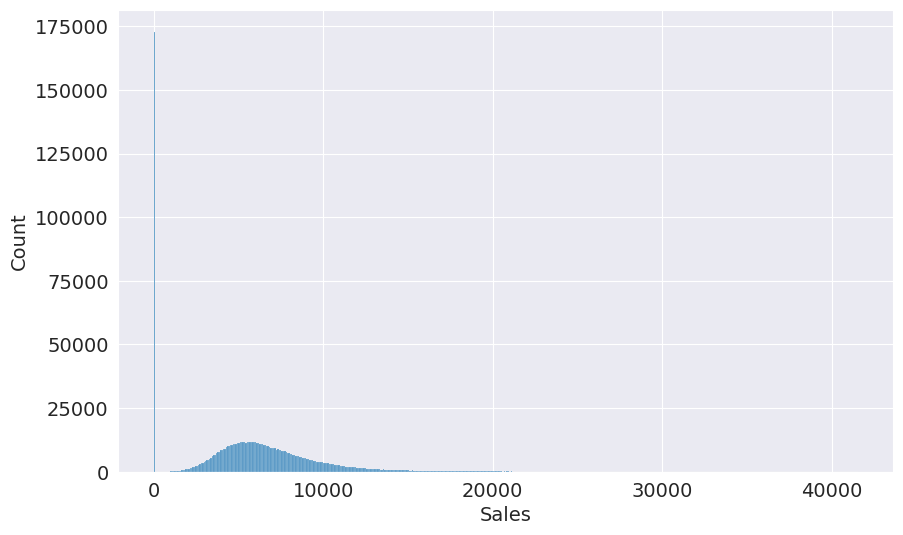

In [ ]:
sns.histplot(data=merged_df, x='Sales')

Can you explain why the sales are 0 on so many dates?

Let's check if this is because the store was closed.

In [ ]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [ ]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

> **EXERCISE**: How will your model predict zero sales on days when the store is closed? It is better to remove these rows from the dataset?

To make our modeling simple, let's simply exclude the dates when the store was closed (we can handle it as a special case while making predictions.

In [ ]:
merged_df = merged_df[merged_df.Open==1].copy()

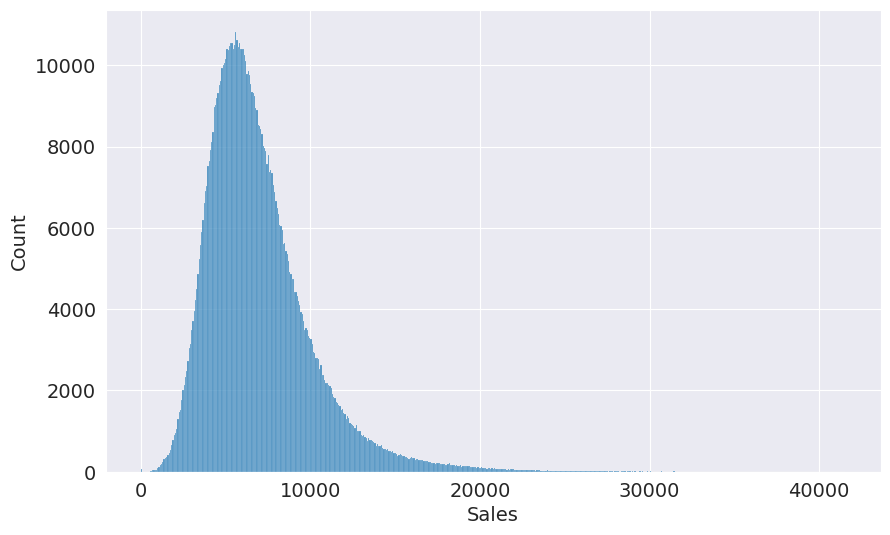

In [ ]:
sns.histplot(data=merged_df, x='Sales');

Let's explore some other columns

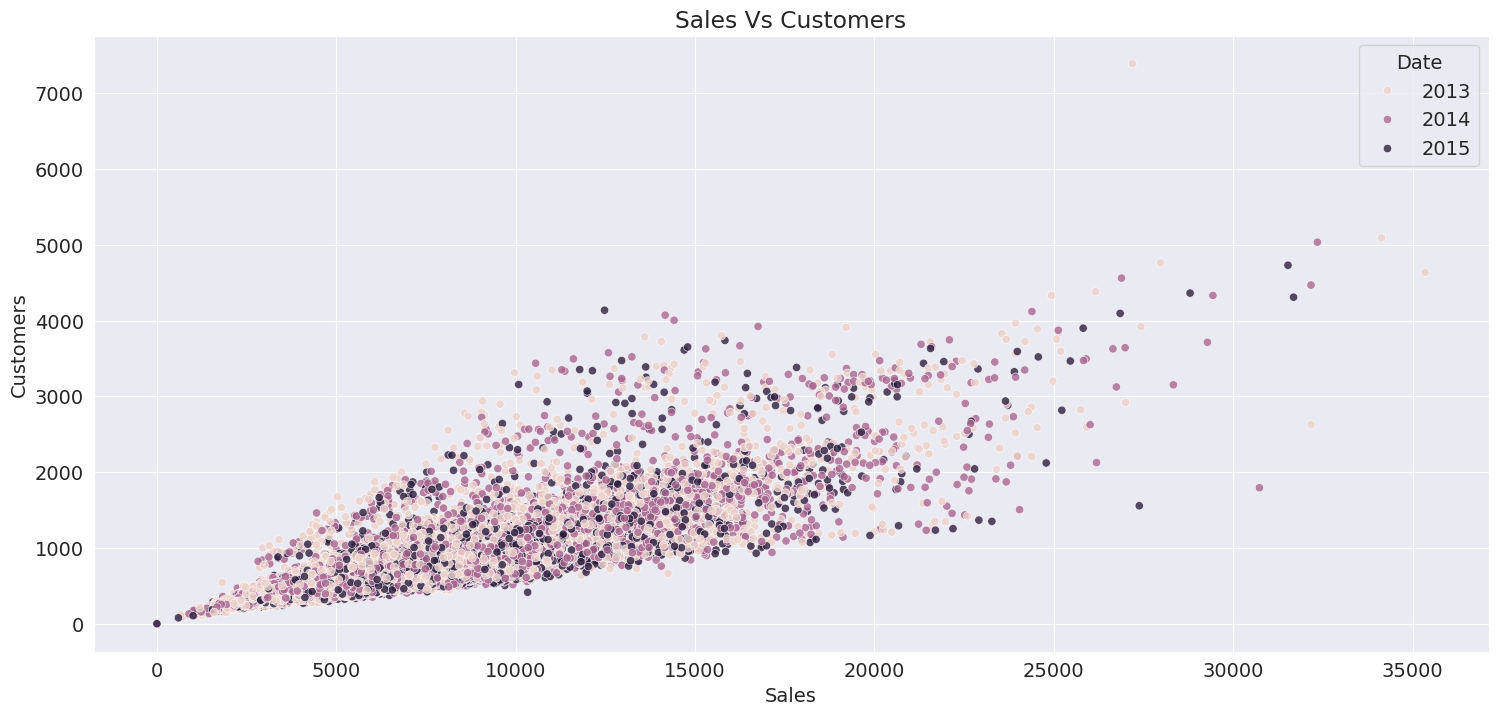

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

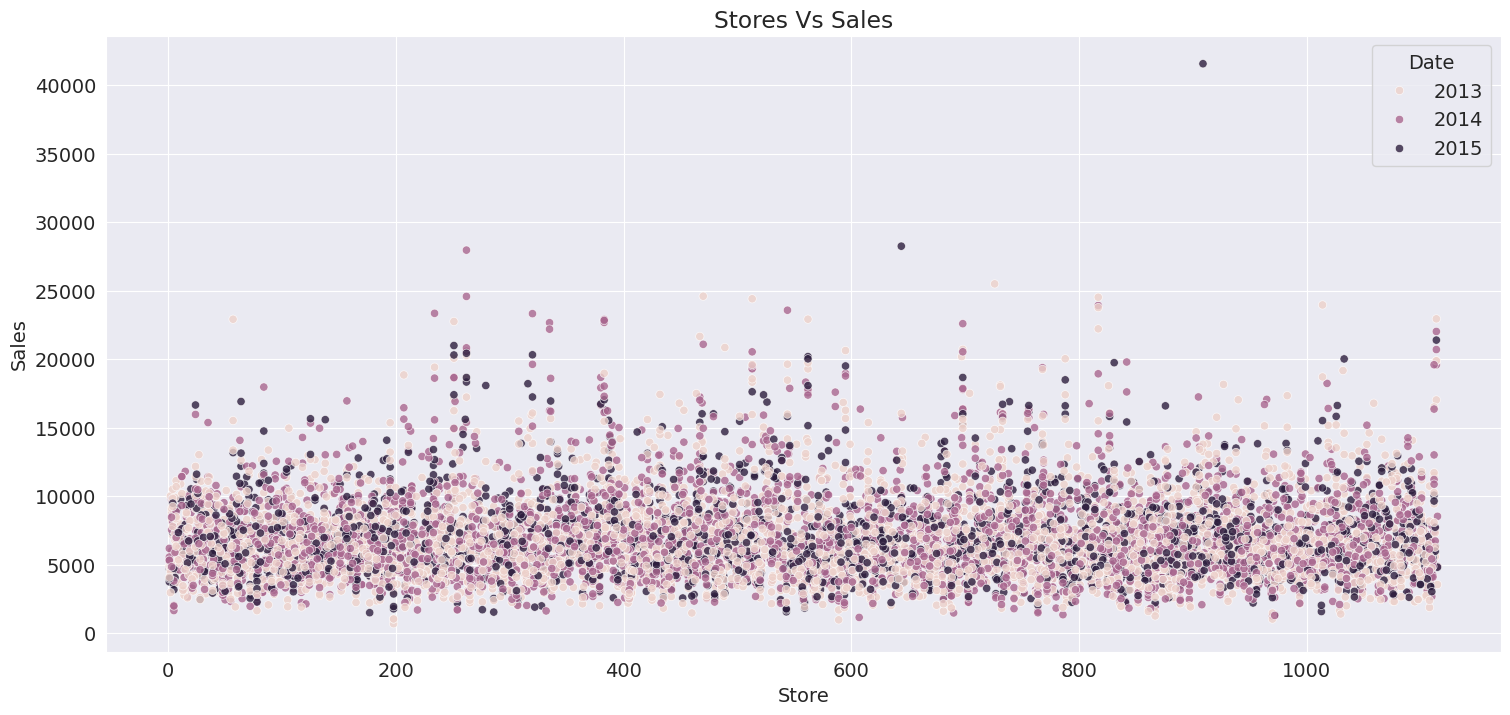

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

we can see the nearly normal distribution

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

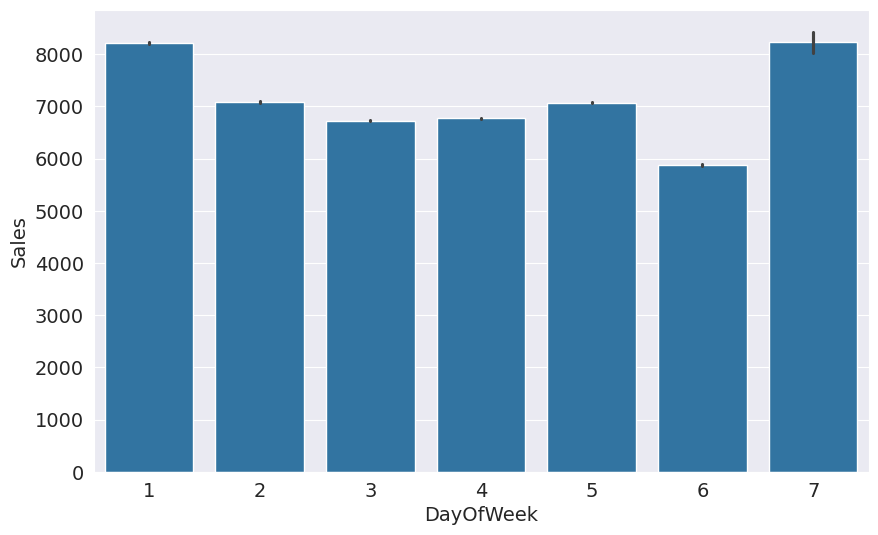

In [ ]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

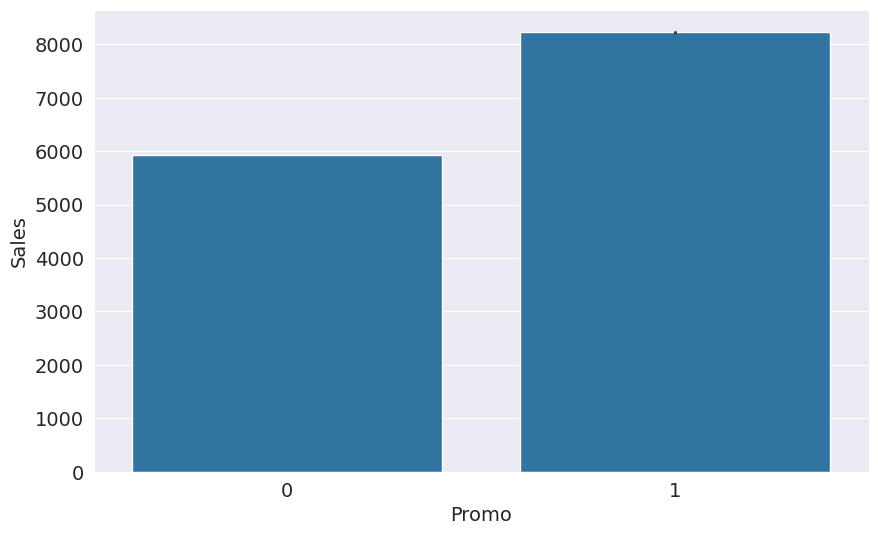

In [ ]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [ ]:
# Select only the numeric columns and exclude the Date column before calculating correlation
numeric_cols_for_corr = merged_df.select_dtypes(include=np.number).columns.tolist()
if 'Date' in numeric_cols_for_corr:
    numeric_cols_for_corr.remove('Date')

merged_df[numeric_cols_for_corr].corr()['Sales'].sort_values(ascending=False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
SchoolHoliday,0.038617
Store,0.007710
CompetitionOpenSinceYear,0.005266
CompetitionOpenSinceMonth,-0.018370
CompetitionDistance,-0.035852
Promo2SinceWeek,-0.058476
Promo2,-0.127596


> **EXERCISE**: Analyze & visualize other columns of the dataset. How are they related to the target column?

### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End



In [ ]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [ ]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

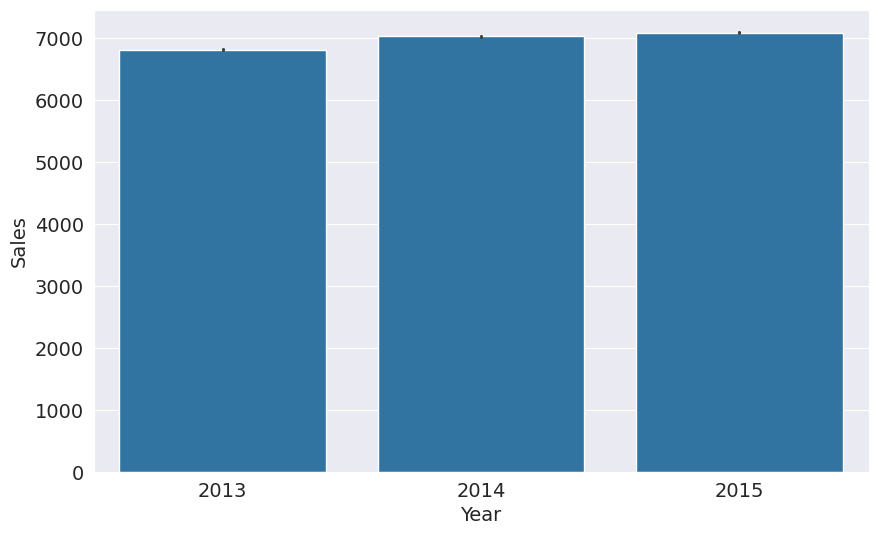

In [ ]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

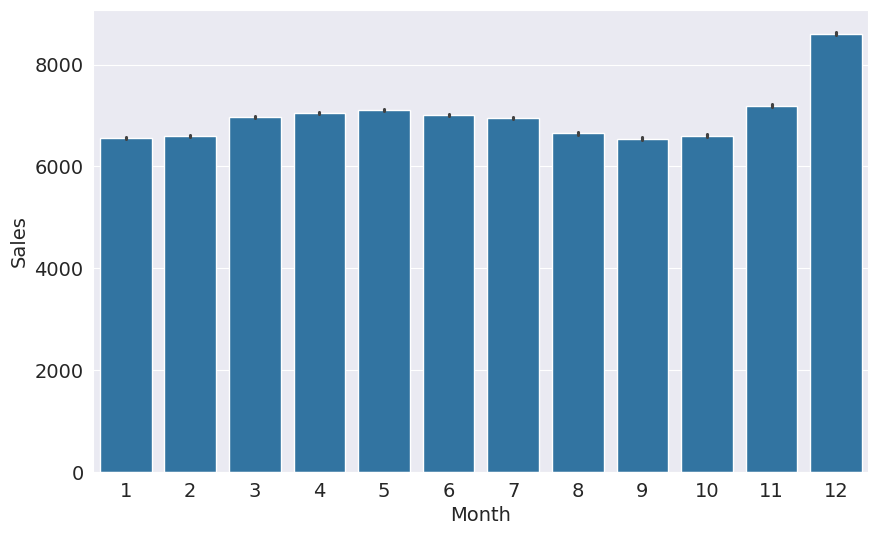

In [ ]:
sns.barplot(data=merged_df, x='Month', y='Sales')



Using date information, we can also create new current columns like:

1. Weather on each day
2. Whether the date was a public holiday
3. Whether the store was running a promotion on that day.


> **EXERCISE**: Create new columns using the above ideas.

> **EXERCISE**: The features `Promo2`, `Promo2SinceWeek` etc. are not very useful in their current form, because they do not relate to the current date. How can you improve their representation?

Let's save our work before continuing.

## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

In [ ]:
len(merged_df)

844392

In [ ]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [ ]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [ ]:
len(train_df), len(val_df)

(633294, 211098)

In [ ]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,0.0,0.0,None,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,0.0,0.0,None,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,0.0,0.0,0,0.0,0.0,None,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,0.0,0.0,None,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,0.0,0.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,0.0,0.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,0.0,0.0,None,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [ ]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [ ]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,0.0,0.0,None,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,0.0,0.0,None,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,0.0,0.0,0,0.0,0.0,None,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,0.0,0.0,None,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,0.0,0.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,0.0,0.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,0.0,0.0,None,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [ ]:
train_df.columns

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [ ]:
target_col = 'Sales'

Let's also separate out numeric and categorical columns.

In [ ]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()
# Test data does not have targets

Note that some columns can be treated as both numeric and categorical, and it's up t you to decide how you want to deal with them.

In [ ]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Note that this step wasn't necessary for the store sales dataset, as there were no null values. Also, we can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

Let's also scale the values to the $(0, 1)$ range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Finally, let's encode categorical columns as one-hot vectors.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Explore the `scikit-learn` preprocessing module: https://scikit-learn.org/stable/modules/preprocessing.html

Let's now extract out the numeric data.

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

Let's save our work before continuing.

## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [ ]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [ ]:
train_preds = return_mean(X_train)

In [ ]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Let's evaluate this to using the RMSE score.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(train_preds, train_targets))

np.float64(3082.450443277419)

In [ ]:
np.sqrt(mean_squared_error(return_mean(X_val), val_targets))

np.float64(3168.6033635047716)

The model is off by about $3000 on average.

Let's try another model, which makes a random guess between the lowest and highest sale.

In [ ]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [ ]:
train_preds = guess_random(X_train)
train_preds

array([ 7005.8633518 , 40451.7555069 , 20201.97836725, ...,
       10927.68300549, 12684.16513129, 24433.47677192])

In [ ]:
np.sqrt(mean_squared_error(train_preds, train_targets))

np.float64(18634.253657683344)

In [ ]:
np.sqrt(mean_squared_error(guess_random(X_val), val_targets))

np.float64(18377.149678366455)

Clearly, this model is much worse.

### Hand-coded Strategies

> **EXERCISE**: Write a function that implements the following strategy:
>
> 1. If the store is closed, return 0.
> 2. If the store is open, return the average sales of the store for the current month in the previous year.
>
> Find the validation set score for this strategy.


### Baseline ML model

Let's train a simple `LinearRegression` model, with no customization.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, train_targets)

LinearRegression()

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">



The we have fit the model, the model can now be used to make predictions. Note that the parameters of the model will not be updated during prediction.

In [ ]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099])

In [ ]:
np.sqrt(mean_squared_error(train_preds, train_targets))

np.float64(2741.587191916578)

In [ ]:
val_preds = linreg.predict(X_val)
val_preds

array([5619.13905784, 5619.23296627, 5997.82860958, ..., 8646.58181098,
       8401.32998235, 7843.07278986])

In [ ]:
np.sqrt(mean_squared_error(val_preds, val_targets))

np.float64(2817.7797940117125)

Note that a simple linear regression model isn't much better than our fixed baseline model which always predicts the mean.

Based on the above baselines, we now know that any model we train should have ideally have a RMSE score lower than $2800. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense.

Let's save our work before continuing.

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">



### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/1.3/_static/ml_map.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

Let's define a function `try_model`, which takes a model, then performs training and evaluation.

In [ ]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)

    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
    return train_rmse, val_rmse

### Linear Models

Read about linear models here: https://scikit-learn.org/stable/modules/linear_model.html


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [ ]:
try_model(LinearRegression())

(np.float64(2741.587191916578), np.float64(2817.7797940117125))

In [ ]:
try_model(Ridge())

(np.float64(2741.5871950814444), np.float64(2817.7784665409863))

In [ ]:
try_model(Lasso())

(np.float64(2741.7143904640566), np.float64(2817.9472924045217))

In [ ]:
try_model(ElasticNet())

(np.float64(2879.0432103903954), np.float64(2972.6658860503385))

In [ ]:
try_model(SGDRegressor())

(np.float64(2742.1616448846917), np.float64(2826.4100876562575))

> **EXERCISE**: Try changing hyperparmeters in the above models and see if you can get a better result.

### Tree Based Models

* Decision trees: https://scikit-learn.org/stable/modules/tree.html
* Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(np.float64(0.0), np.float64(1559.7378600480247))

Seems like the decision tree performs much better than linear models.

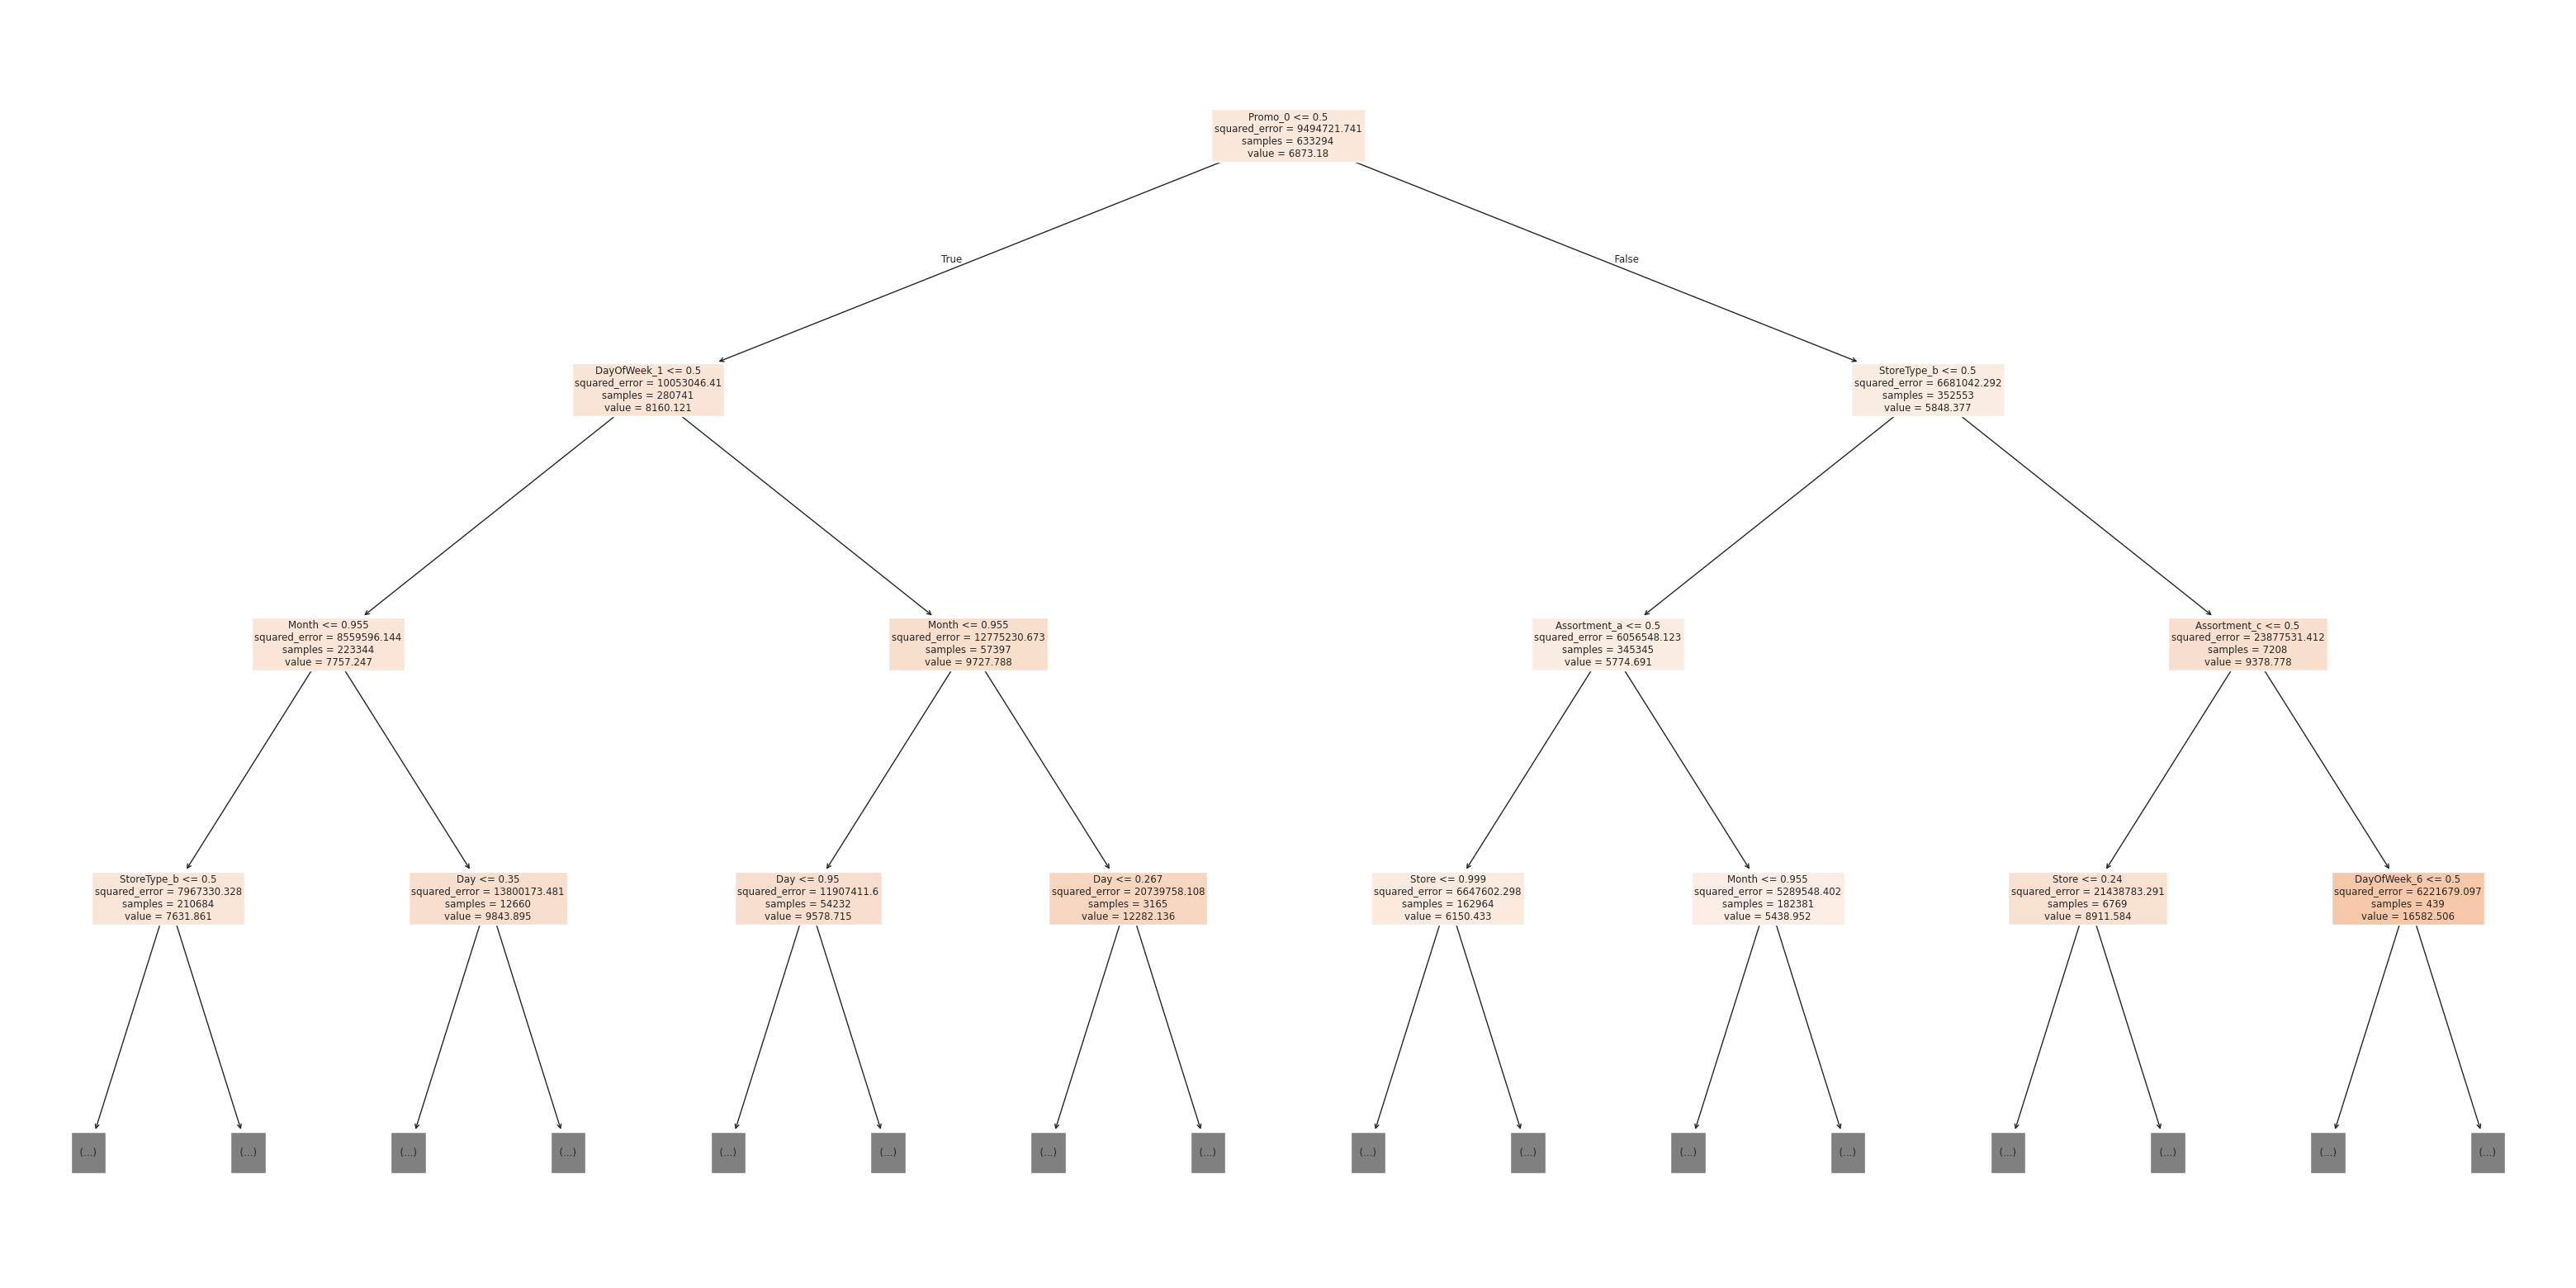

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Let's try a random forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: user 6min 51s, sys: 4.52 s, total: 6min 56s
Wall time: 4min 4s


(np.float64(474.9198974666898), np.float64(1371.7321923469985))

We've seen a significant reduction in the loss by using a random forest.

**EXERCISE**: Tune the hyperparameters of the decision tree and random forest to get better results.

### Other Supervised Learning Models

See https://scikit-learn.org/stable/supervised_learning.html

> **EXERCISE**: Try some other supervised learning algorithms and see if you can get a better result.

### Unsupervised Learning Techniques

See https://scikit-learn.org/stable/unsupervised_learning.html (not applicable for this problem)

Let's save our work before continuing.

## Step 7 - Experiment and combine results from multiple strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

> **EXERCISE**: Apply grid search to find the best hyperparameters for the random forest regressor trained earlier.

### K-Fold Cross Validation


Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

<img src="https://i.imgur.com/MxnzWwT.png" width="480">

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

> **EXERCISE**: Apply K fold cross validation for the random forest regressor trained earlier.

### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">



> **EXERCISE**: Ensemble the result of a random forest and a ridge regressor. Can you get a better score than either of the two models?

Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually
- takes the output of the each of the model figures out the each weigts to each model to get the optimal solution
 ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)):

<img src="https://i.imgur.com/VVzCWNB.png" width="400">


1. we can also give the weightage of the each model
so that it can feel which model ouput is consider the most of the times

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

> **EXERCISE**: Combine the results of several model using stacking and try to minimize the RMSE for the validation set.

Let's save our work before continuing.

## Step 8 - Interpret models, study individual predictions & present your findings

<img src="https://i.imgur.com/9axhOrA.png" width="640">

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

In [ ]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [ ]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


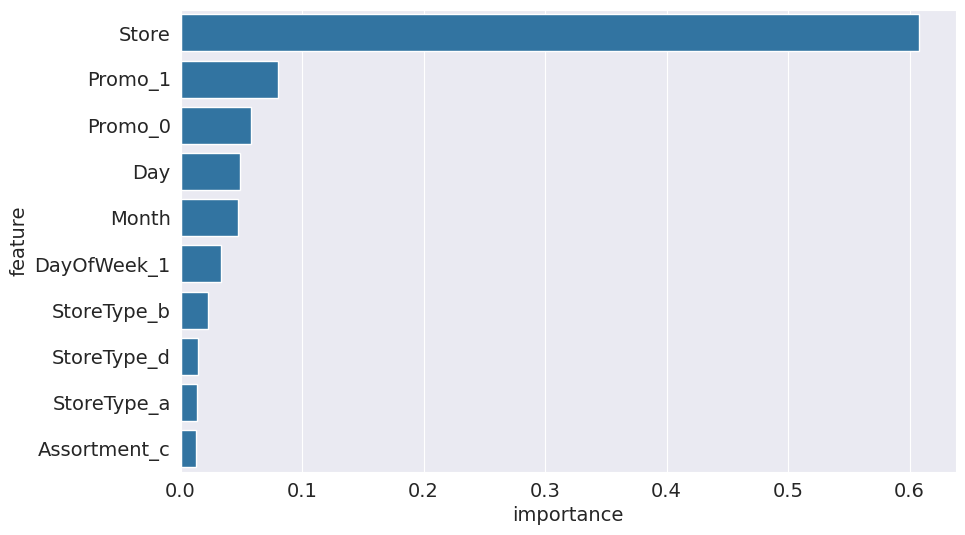

In [ ]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decision tree can be used.

### Looking at individual predictions

In [ ]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [ ]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [ ]:
predict_input(rf, sample_input)

np.float64(4258.01)

Look at various examples from the training, validation and test sets to decide if you're happy with the result of your model.

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

### Making a submission on Kaggle

If you're participating in a Kaggle competition, you can generate a submission CSV file and make a submission to check your score on the test set.

In [ ]:
test_preds = rf.predict(X_test)
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [ ]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [ ]:
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')

In [ ]:
submission_df.fillna(0, inplace=True)

In [ ]:
submission_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

Id,Sales
1,4258.01
2,7713.83
3,8775.7
4,6775.37
5,6492.47
6,5750.74
7,8081.26
8,8166.45
9,5893.82


In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('submission.csv')

/content/submission.csv

You can now make a submission on this page: https://www.kaggle.com/c/rossmann-store-sales/submit


> **EXERCISE**: Try different modeling approaches & hyperparameters for the Rossmann Store Sales prediction competition and make submissions to Kaggle. Track your results in a spreadsheet. What's the highest score you are able to achieve?

> **EXERCISE**: Repeat the steps from this notebook with the Breast Cancer Identification dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

### Model Deployment

At this point, the model can be handed over to a software developer / ML engineer who can put the model into production, as part of an existing software system. It's important to monitor the results of the model, and make improvements from time to time.

Check out this tutorial on how to deploy a model to the Heroku platform using the Flask framework: https://towardsdatascience.com/create-an-api-to-deploy-machine-learning-models-using-flask-and-heroku-67a011800c50

Let's save our work before continuing.

## Summary and References

![](https://i.imgur.com/kKdAALX.png)

Here's the summary of the step-by-step process you should follow to approach any machine learning problem:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
5. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
6. Experiment and combine results from multiple strategies to get a better overall result.
7. Interpret models, study individual predictions, and present your findings.


Check out the following resources to learn more:

- https://vas3k.com/blog/machine_learning/
- https://github.com/abhishekkrthakur/approachingalmost
- https://scikit-learn.org/stable/
- https://github.com/microsoft/ML-For-Beginners

## Revision Questions
1.	What are the steps involved in approaching a machine learning problem?
2.	What does problem identification mean?
3.	What is a loss function? Explain different loss functions.
4.	What is an evaluation metric? Explain different evaluation metrics.
5.	What is feature engineering?
6.	How does feature engineering help in building a better model?
7.	What is a baseline model?
8.	What is a hard-coded strategy?
9.	What are linear models?
10.	What are tree based models?
11.	What are some unsupervised machine learning problems?
12.	What are some strategies used to improve the performance of a model?
13.	What is grid-search?
14.	What is K-fold cross validation?
15.	What is ensembling? What are some ensemble methods?
16.	How does ensembling help in making better predictions?
17.	What is stacking?
18.	How does stacking help in making better predictions?
19.	What is model deployment?
20.	What are some model deployment frameworks?

This output from `store_df.info()` provides a concise summary of the `store_df` DataFrame:

*   **`<class 'pandas.core.frame.DataFrame'>`**: Confirms that `store_df` is a pandas DataFrame.
*   **`RangeIndex: 1115 entries, 0 to 1114`**: Indicates that the DataFrame has 1115 rows, indexed from 0 to 1114. This aligns with the information that there are 1115 stores.
*   **`Data columns (total 10 columns)`**: Shows that the DataFrame has a total of 10 columns.
*   **`#   Column                     Non-Null Count  Dtype`**: This is the header for the list of columns.
    *   `Column`: The name of the column.
    *   `Non-Null Count`: The number of non-missing values in each column.
    *   `Dtype`: The data type of the column.
*   **Column List**: Each row after the header details a specific column:
    *   `Store`: Integer type (`int64`), no missing values (1115 non-null).
    *   `StoreType`: Object type (`object`), no missing values (1115 non-null). This usually indicates strings or mixed types.
    *   `Assortment`: Object type (`object`), no missing values (1115 non-null). Similar to `StoreType`, likely strings.
    *   `CompetitionDistance`: Float type (`float64`), has missing values (1112 non-null out of 1115).
    *   `CompetitionOpenSinceMonth`: Float type (`float64`), has many missing values (761 non-null out of 1115).
    *   `CompetitionOpenSinceYear`: Float type (`float64`), has many missing values (761 non-null out of 1115).
    *   `Promo2`: Integer type (`int64`), no missing values (1115 non-null).
    *   `Promo2SinceWeek`: Float type (`float64`), has many missing values (571 non-null out of 1115).
    *   `Promo2SinceYear`: Float type (`float64`), has many missing values (571 non-null out of 1115).
    *   `PromoInterval`: Object type (`object`), has many missing values (571 non-null out of 1115). Likely strings representing months.
*   **`dtypes: float64(5), int64(2), object(3)`**: Summarizes the number of columns per data type. There are 5 float columns, 2 integer columns, and 3 object columns.
*   **`memory usage: 87.2+ KB`**: Shows the memory usage of the DataFrame.

**Summary**: The `store_df` contains information about 1115 stores with 10 columns. Several columns related to competition and Promo2 have missing values that will need to be handled during data preprocessing.

# Removing Closed Store Data

To simplify modeling, we will remove the rows where the store was closed, as the sales are always 0 on these days. We can handle closed stores as a special case during prediction.

In [ ]:
merged_df = merged_df[merged_df.Open == 1].copy()

This code filters the `merged_df` DataFrame to keep only the rows where the `Open` column is equal to 1, effectively removing the data for days when the stores were closed. The `.copy()` is used to ensure that we are working with a new DataFrame and avoid potential SettingWithCopyWarning issues.

Let's explore the relationship between `DayOfWeek` and `Sales`.

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

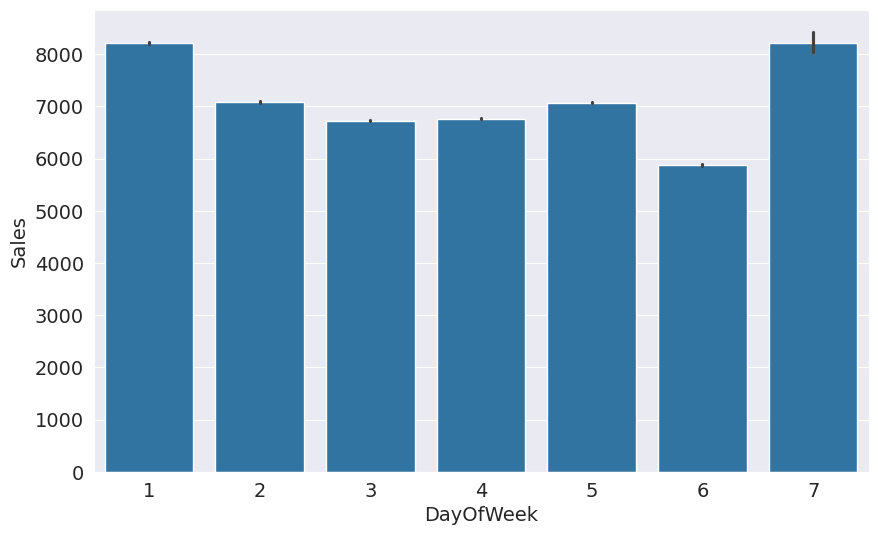

In [ ]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

Now, let's examine the impact of promotions (`Promo`) on `Sales`.

<Axes: xlabel='Promo', ylabel='Sales'>

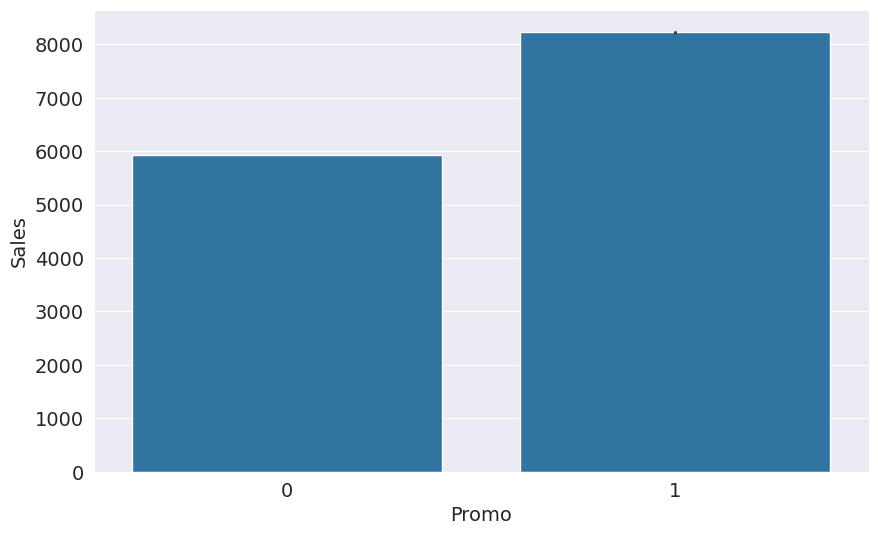

In [ ]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

We can also look at the correlation of numerical columns with `Sales`.

In [ ]:
merged_df.corr()['Sales'].sort_values(ascending=False)

ValueError: could not convert string to float: 'a'

# Task
Explain the provided dataframes, suggest how to clean them, and provide a plan for further analysis, presenting each step of the plan in a markdown cell followed by a code cell and an explanation in a markdown cell.

## Feature engineering

### Subtask:
Create new features from existing columns (e.g., date-based features, competition/promo related features) that could be relevant for predicting sales.


**Reasoning**:
Extract date-based features from the 'Date' column for both training and test dataframes.



In [ ]:
merged_df['Year'] = merged_df.Date.dt.year
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Day'] = merged_df.Date.dt.day
merged_df['WeekOfYear'] = merged_df.Date.dt.isocalendar().week.astype(int)
merged_df['DayOfYear'] = merged_df.Date.dt.dayofyear
merged_df['IsWeekend'] = merged_df['DayOfWeek'].apply(lambda x: 1 if x in (6, 7) else 0)

merged_test_df['Year'] = merged_test_df.Date.dt.year
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['WeekOfYear'] = merged_test_df.Date.dt.isocalendar().week.astype(int)
merged_test_df['DayOfYear'] = merged_test_df.Date.dt.dayofyear
merged_test_df['IsWeekend'] = merged_test_df['DayOfWeek'].apply(lambda x: 1 if x in (6, 7) else 0)

print("New date-based features created in merged_df:")
print(merged_df[['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfYear', 'IsWeekend']].head())
print("\nNew date-based features created in merged_test_df:")
print(merged_test_df[['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfYear', 'IsWeekend']].head())

New date-based features created in merged_df:
        Date  Year  Month  Day  WeekOfYear  DayOfYear  IsWeekend
0 2015-07-31  2015      7   31          31        212          0
1 2015-07-31  2015      7   31          31        212          0
2 2015-07-31  2015      7   31          31        212          0
3 2015-07-31  2015      7   31          31        212          0
4 2015-07-31  2015      7   31          31        212          0

New date-based features created in merged_test_df:
        Date  Year  Month  Day  WeekOfYear  DayOfYear  IsWeekend
0 2015-09-17  2015      9   17          38        260          0
1 2015-09-17  2015      9   17          38        260          0
2 2015-09-17  2015      9   17          38        260          0
3 2015-09-17  2015      9   17          38        260          0
4 2015-09-17  2015      9   17          38        260          0


**Reasoning**:
Create features related to competition opening date and calculate the number of days since the competition opened.



## Feature engineering

### Subtask:
Feature engineering (Retry 1): Create new features from existing columns (e.g., date-based features, competition/promo related features) that could be relevant for predicting sales.


**Reasoning**:
The previous attempt to create 'Promo2Since' failed because filling missing year and week with 0 results in an invalid date string ('0-01-01'). I need to handle the missing values differently for Promo2SinceYear and Promo2SinceWeek to create a valid date string before converting it to datetime. A placeholder date like '1900-01-01' should be used for rows where Promo2 is 0 or where year/week are missing.



In [ ]:
# Create date-based features
merged_df['Year'] = merged_df.Date.dt.year
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Day'] = merged_df.Date.dt.day
merged_df['WeekOfYear'] = merged_df.Date.dt.isocalendar().week.astype(int)
merged_df['DayOfYear'] = merged_df.Date.dt.dayofyear
merged_df['IsWeekend'] = merged_df['DayOfWeek'].apply(lambda x: 1 if x in (6, 7) else 0)

merged_test_df['Year'] = merged_test_df.Date.dt.year
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['WeekOfYear'] = merged_test_df.Date.dt.isocalendar().week.astype(int)
merged_test_df['DayOfYear'] = merged_test_df.Date.dt.dayofyear
merged_test_df['IsWeekend'] = merged_test_df['DayOfWeek'].apply(lambda x: 1 if x in (6, 7) else 0)

# Create CompetitionOpenSince date
# Fill NaN values in year/month before creating the string
merged_df['CompetitionOpenSince'] = pd.to_datetime(merged_df['CompetitionOpenSinceYear'].fillna(1900).astype(int).astype(str) + '-' +
                                                  merged_df['CompetitionOpenSinceMonth'].fillna(1).astype(int).astype(str) + '-01', errors='coerce').fillna(pd.Timestamp('1900-01-01'))

merged_test_df['CompetitionOpenSince'] = pd.to_datetime(merged_test_df['CompetitionOpenSinceYear'].fillna(1900).astype(int).astype(str) + '-' +
                                                      merged_test_df['CompetitionOpenSinceMonth'].fillna(1).astype(int).astype(str) + '-01', errors='coerce').fillna(pd.Timestamp('1900-01-01'))

# Calculate days since competition opened
merged_df['CompetitionOpenDays'] = (merged_df['Date'] - merged_df['CompetitionOpenSince']).dt.days
merged_test_df['CompetitionOpenDays'] = (merged_test_df['Date'] - merged_test_df['CompetitionOpenSince']).dt.days

# Handle cases where CompetitionOpenSince was imputed with the far past date
merged_df.loc[merged_df['CompetitionOpenSince'] == pd.Timestamp('1900-01-01'), 'CompetitionOpenDays'] = -1
merged_test_df.loc[merged_test_df['CompetitionOpenSince'] == pd.Timestamp('1900-01-01'), 'CompetitionOpenDays'] = -1

# Create Promo2Since date
# Handle cases where Promo2 is 0 or year/week are missing by setting to a placeholder date
placeholder_date = pd.Timestamp('1900-01-01')

def create_promo2_date(row):
    if row['Promo2'] == 0 or pd.isna(row['Promo2SinceYear']) or pd.isna(row['Promo2SinceWeek']):
        return placeholder_date
    try:
        # Construct date from year and week
        return pd.to_datetime(f"{int(row['Promo2SinceYear'])}-{int(row['Promo2SinceWeek'])}-1", format='%Y-%W-%w', errors='coerce')
    except:
        return placeholder_date

merged_df['Promo2Since'] = merged_df.apply(create_promo2_date, axis=1)
merged_test_df['Promo2Since'] = merged_test_df.apply(create_promo2_date, axis=1)

# Calculate days since Promo2 opened
merged_df['Promo2OpenDays'] = (merged_df['Date'] - merged_df['Promo2Since']).dt.days
merged_test_df['Promo2OpenDays'] = (merged_test_df['Date'] - merged_test_df['Promo2Since']).dt.days

# Handle cases where Promo2Since was imputed
merged_df.loc[merged_df['Promo2Since'] == placeholder_date, 'Promo2OpenDays'] = -1
merged_test_df.loc[merged_test_df['Promo2Since'] == placeholder_date, 'Promo2OpenDays'] = -1

# Create binary features for PromoInterval
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

for month_num, month_abbr in month_map.items():
    col_name = f'Promo_{month_abbr}'
    merged_df[col_name] = ((merged_df['Month'] == month_num) &
                           (merged_df['Promo2'] == 1) &
                           (merged_df['PromoInterval'].str.contains(month_abbr, na=False))).astype(int)
    merged_test_df[col_name] = ((merged_test_df['Month'] == month_num) &
                                (merged_test_df['Promo2'] == 1) &
                                (merged_test_df['PromoInterval'].str.contains(month_abbr, na=False))).astype(int)

print("Merged DataFrame with new features:")
display(merged_df.head())
print("\nMerged Test DataFrame with new features:")
display(merged_test_df.head())

Merged DataFrame with new features:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,0,0,0,0,1,0,0,0,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,0,0,0,0,1,0,0,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,0,0,0,0,0,0,0,0,0



Merged Test DataFrame with new features:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,0,0,0,0,0,0,0,0,0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,0,0,0,0,0,0,0,0,0,0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,0,0,0,0,0,0,0,0,0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,0,0,0,0,0,0,0,0,0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,0,0,0,0,0,0,0,0,0,0


## Data preprocessing

### Subtask:
Prepare the data for modeling, including handling categorical features (e.g., one-hot encoding) and scaling numerical features.


**Reasoning**:
Identify the numerical and categorical columns for preprocessing.



In [ ]:
numeric_cols = ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
                'Day', 'Month', 'Year', 'WeekOfYear', 'DayOfYear', 'CompetitionOpenDays', 'Promo2OpenDays']

categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
                    'Assortment', 'Promo2', 'PromoInterval', 'IsWeekend',
                    'Promo_Jan', 'Promo_Feb', 'Promo_Mar', 'Promo_Apr', 'Promo_May',
                    'Promo_Jun', 'Promo_Jul', 'Promo_Aug', 'Promo_Sept', 'Promo_Oct',
                    'Promo_Nov', 'Promo_Dec']

print("Numerical columns identified:", numeric_cols)
print("Categorical columns identified:", categorical_cols)

Numerical columns identified: ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Day', 'Month', 'Year', 'WeekOfYear', 'DayOfYear', 'CompetitionOpenDays', 'Promo2OpenDays']
Categorical columns identified: ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2', 'PromoInterval', 'IsWeekend', 'Promo_Jan', 'Promo_Feb', 'Promo_Mar', 'Promo_Apr', 'Promo_May', 'Promo_Jun', 'Promo_Jul', 'Promo_Aug', 'Promo_Sept', 'Promo_Oct', 'Promo_Nov', 'Promo_Dec']


**Reasoning**:
Apply one-hot encoding to the categorical columns in both the training and testing dataframes.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(merged_df[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

merged_df[encoded_cols] = encoder.transform(merged_df[categorical_cols])
merged_test_df[encoded_cols] = encoder.transform(merged_test_df[categorical_cols])

print("Categorical columns after one-hot encoding:")
print(merged_df[encoded_cols].head())

Categorical columns after one-hot encoding:
   DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0          0.0          0.0          0.0          0.0          1.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          1.0   
3          0.0          0.0          0.0          0.0          1.0   
4          0.0          0.0          0.0          0.0          1.0   

   DayOfWeek_6  DayOfWeek_7  Promo_0  Promo_1  StateHoliday_0  ...  \
0          0.0          0.0      0.0      1.0             1.0  ...   
1          0.0          0.0      0.0      1.0             1.0  ...   
2          0.0          0.0      0.0      1.0             1.0  ...   
3          0.0          0.0      0.0      1.0             1.0  ...   
4          0.0          0.0      0.0      1.0             1.0  ...   

   Promo_Aug_0  Promo_Aug_1  Promo_Sept_0  Promo_Sept_1  Promo_Oct_0  \
0          1.0          0.0           1.0 

**Reasoning**:
Apply Min-Max scaling to the numerical columns in both the training and testing dataframes.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(merged_df[numeric_cols])

merged_df[numeric_cols] = scaler.transform(merged_df[numeric_cols])
merged_test_df[numeric_cols] = scaler.transform(merged_test_df[numeric_cols])

print("Numerical columns after scaling:")
print(merged_df[numeric_cols].head())

Numerical columns after scaling:
      Store  CompetitionDistance  CompetitionOpenSinceMonth  \
0  0.000000             0.016482                   0.750000   
1  0.000898             0.007252                   0.916667   
2  0.001795             0.186050                   1.000000   
3  0.002693             0.007911                   0.750000   
4  0.003591             0.394119                   0.333333   

   CompetitionOpenSinceYear  Promo2SinceWeek  Promo2SinceYear  Day     Month  \
0                  0.996526             0.00         0.000000  1.0  0.545455   
1                  0.996030             0.26         0.997519  1.0  0.545455   
2                  0.995533             0.28         0.998015  1.0  0.545455   
3                  0.997022             0.00         0.000000  1.0  0.545455   
4                  1.000000             0.00         0.000000  1.0  0.545455   

   Year  WeekOfYear  DayOfYear  CompetitionOpenDays  Promo2OpenDays  
0   1.0    0.588235    0.57967       

**Reasoning**:
Create the final processed training and testing feature sets and the training target set.



**Reasoning**:
The previous command failed because `target_col` was not defined in the current execution. Define `target_col` and then create the final processed training and testing feature sets and the training target set.



In [ ]:
target_col = 'Sales'

X = merged_df[numeric_cols + encoded_cols]
y = merged_df[target_col]
X_test = merged_test_df[numeric_cols + encoded_cols]

# The validation set was created in a previous step, so we don't need to recreate it here.
# We'll use the indices from the previous split to separate train and validation sets from X and y
train_size = int(.75 * len(merged_df))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (633294, 67)
Shape of y_train: (633294,)
Shape of X_val: (211098, 67)
Shape of y_val: (211098,)
Shape of X_test: (41088, 67)


## Baseline modeling

### Subtask:
Establish one or more simple baseline models to benchmark the performance of more complex models.


**Reasoning**:
Define and evaluate a simple baseline model that predicts the mean of the training targets.



**Reasoning**:
The previous command failed because the `squared` argument in `mean_squared_error` is not available in the installed scikit-learn version. The square root of the mean squared error can be calculated manually by taking the square root of the result of `mean_squared_error` without the `squared` argument.



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_baseline(X_train, y_train, X_val, y_val):
    # Calculate the mean of the training targets
    mean_sales = y_train.mean()

    # Create baseline predictions
    train_preds_baseline = np.full(len(X_train), mean_sales)
    val_preds_baseline = np.full(len(X_val), mean_sales)

    # Calculate RMSE (take the square root of MSE)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds_baseline))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_preds_baseline))

    return train_rmse, val_rmse

# Evaluate the baseline model
train_rmse_baseline, val_rmse_baseline = evaluate_baseline(X_train, y_train, X_val, y_val)

print(f"Baseline Training RMSE: {train_rmse_baseline}")
print(f"Baseline Validation RMSE: {val_rmse_baseline}")

Baseline Training RMSE: 3132.6381896692524
Baseline Validation RMSE: 3021.583849869234


## Model selection and training

### Subtask:
Choose appropriate machine learning models (e.g., tree-based models like Random Forest or Gradient Boosting) and train them on the training data.


**Reasoning**:
Import the required libraries for training Random Forest and Gradient Boosting models.



In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

**Reasoning**:
Instantiate and train the RandomForestRegressor model.



In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9880046062669245

In [ ]:
train_rmse_rf = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, rf.predict(X_val)))
print(f"Training RMSE: {train_rmse_rf}")
print(f"Validation RMSE: {val_rmse_rf}")


Training RMSE: 343.09745129800876
Validation RMSE: 1119.7440195625882


In [ ]:
rf.feature_importances_

array([1.40546571e-01, 1.82931849e-01, 5.73206528e-02, 6.19301888e-02,
       2.55901987e-02, 3.14649942e-02, 3.22253266e-02, 3.53443143e-03,
       3.17884219e-03, 1.36431340e-02, 4.92881839e-02, 5.96749897e-02,
       1.95224091e-02, 3.45487907e-02, 4.71871017e-03, 1.64174296e-03,
       1.60645969e-03, 4.44759277e-03, 5.85875472e-03, 4.32918778e-03,
       7.95790111e-02, 5.76124837e-02, 1.27215368e-03, 1.87401730e-04,
       2.52764443e-05, 1.17763534e-05, 1.68839149e-03, 1.67026812e-03,
       1.49448378e-02, 2.62786582e-02, 1.06676103e-02, 7.97969436e-03,
       1.09874021e-02, 4.97951386e-04, 1.51477754e-02, 1.99398994e-03,
       1.66769433e-03, 2.88182284e-03, 5.31953840e-03, 5.47385706e-03,
       1.83151000e-03, 5.78100157e-03, 5.78519780e-03, 8.83595581e-05,
       9.09584796e-05, 6.87323596e-05, 6.92572906e-05, 6.05585967e-05,
       5.71212288e-05, 3.24990026e-04, 3.22080477e-04, 1.03276034e-04,
       1.03494592e-04, 7.30041175e-05, 7.26338161e-05, 1.32464892e-04,
      

- co effecients of the rf

In [ ]:
rf_feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_feature_importances.sort_values(ascending=False)

,0
CompetitionDistance,0.182932
Store,0.140547
Promo_0,0.079579
CompetitionOpenSinceYear,0.061930
CompetitionOpenDays,0.059675
...,...
Promo_Sept_0,0.000043
Promo_Nov_0,0.000039
Promo_Nov_1,0.000038
StateHoliday_b,0.000025


plot top 10 of that

<Axes: >

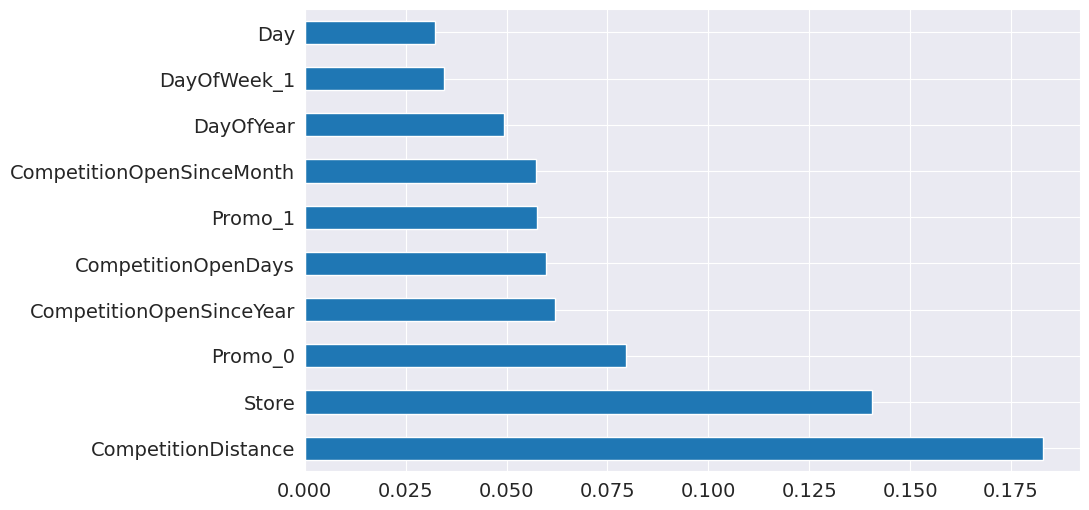

In [ ]:
#ploting the top ten
rf_feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')

Draw the graph of the feature importance top 10 wiht high value

In [ ]:
high_feature_indices = rf.feature_importances_.argsort()[-10:][::-1]
high_feature_indices

array([ 1,  0, 20,  3, 11, 21,  2, 10, 13,  6])

- predict the data of the test

In [ ]:
test_preds_rf = rf.predict(X_test)

In [ ]:
test_preds_rf

array([ 4453.96,  7389.47,  9406.51, ...,  6478.2 , 23955.78,  8312.53])

- concatinate the test_preds_rf with the test_input

In [ ]:
test_df_merge_output = pd.concat([merged_test_df, pd.Series(test_preds_rf, name='Sales')], axis=1)

In [ ]:
test_df_merge_output

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo_Aug_1,Promo_Sept_0,Promo_Sept_1,Promo_Oct_0,Promo_Oct_1,Promo_Nov_0,Promo_Nov_1,Promo_Dec_0,Promo_Dec_1,Sales
0,1,0.000000,4,2015-09-17,1.0,1,0,0,c,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4453.96
1,2,0.001795,4,2015-09-17,1.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7389.47
2,3,0.005386,4,2015-09-17,1.0,1,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9406.51
3,4,0.006284,4,2015-09-17,1.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7815.25
4,5,0.007181,4,2015-09-17,1.0,1,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7695.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,0.996409,6,2015-08-01,1.0,0,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2938.22
41084,41085,0.997307,6,2015-08-01,1.0,0,0,0,c,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7378.20
41085,41086,0.998205,6,2015-08-01,1.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6478.20
41086,41087,0.999102,6,2015-08-01,1.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,23955.78


check the output if the store is closed which open equal to 0

In [ ]:
when_store_closed = test_df_merge_output[test_df_merge_output['Open'] == 0]

In [ ]:
when_store_closed

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo_Aug_1,Promo_Sept_0,Promo_Sept_1,Promo_Oct_0,Promo_Oct_1,Promo_Nov_0,Promo_Nov_1,Promo_Dec_0,Promo_Dec_1,Sales
543,544,0.630162,4,2015-09-17,0.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3176.49
676,677,0.788151,4,2015-09-17,0.0,1,0,0,d,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4351.41
840,841,0.983842,4,2015-09-17,0.0,1,0,0,b,b,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11007.91
1399,1400,0.630162,3,2015-09-16,0.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3217.59
1532,1533,0.788151,3,2015-09-16,0.0,1,0,0,d,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4345.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40227,40228,0.996409,7,2015-08-02,0.0,0,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3292.66
40228,40229,0.997307,7,2015-08-02,0.0,0,0,0,c,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5460.84
40229,40230,0.998205,7,2015-08-02,0.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5817.99
40230,40231,0.999102,7,2015-08-02,0.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,22624.21


now i have to make that sale on which day the sotre is closed to zero

In [ ]:
test_df_merge_output.loc[test_df_merge_output['Open'] == 0, 'Sales'] = 0

now check the sales and when store was closed

In [ ]:
when_store_closed = test_df_merge_output[test_df_merge_output['Open'] == 0]
when_store_closed

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo_Aug_1,Promo_Sept_0,Promo_Sept_1,Promo_Oct_0,Promo_Oct_1,Promo_Nov_0,Promo_Nov_1,Promo_Dec_0,Promo_Dec_1,Sales
543,544,0.630162,4,2015-09-17,0.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
676,677,0.788151,4,2015-09-17,0.0,1,0,0,d,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
840,841,0.983842,4,2015-09-17,0.0,1,0,0,b,b,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1399,1400,0.630162,3,2015-09-16,0.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1532,1533,0.788151,3,2015-09-16,0.0,1,0,0,d,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40227,40228,0.996409,7,2015-08-02,0.0,0,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
40228,40229,0.997307,7,2015-08-02,0.0,0,0,0,c,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
40229,40230,0.998205,7,2015-08-02,0.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
40230,40231,0.999102,7,2015-08-02,0.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


##we we need to undertsand the submission csv file and write the predicted values into it of the test data

In [ ]:
submission_df = pd.read_csv('/content/rossmann-store-sales/sample_submission.csv')


In [ ]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:
test_df_merge_output

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo_Aug_1,Promo_Sept_0,Promo_Sept_1,Promo_Oct_0,Promo_Oct_1,Promo_Nov_0,Promo_Nov_1,Promo_Dec_0,Promo_Dec_1,Sales
0,1,0.000000,4,2015-09-17,1.0,1,0,0,c,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4453.96
1,2,0.001795,4,2015-09-17,1.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7389.47
2,3,0.005386,4,2015-09-17,1.0,1,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9406.51
3,4,0.006284,4,2015-09-17,1.0,1,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7815.25
4,5,0.007181,4,2015-09-17,1.0,1,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7695.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,0.996409,6,2015-08-01,1.0,0,0,0,a,a,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2938.22
41084,41085,0.997307,6,2015-08-01,1.0,0,0,0,c,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7378.20
41085,41086,0.998205,6,2015-08-01,1.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6478.20
41086,41087,0.999102,6,2015-08-01,1.0,0,0,0,a,c,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,23955.78


In [ ]:
submission_df['Sales'] = test_df_merge_output['Sales']

In [ ]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      41088 non-null  int64  
 1   Sales   41088 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 642.1 KB


- how many rows with the zero sales

In [ ]:
len(submission_df[submission_df['Sales'] == 0])

5984

In [ ]:
submission_df.to_csv('submission.csv', index=False)

Now i have to concatinate this ouput with the sales which i got on the target_df_

**Reasoning**:
Instantiate and train the GradientBoostingRegressor model.



In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
gbr.score(X_train, y_train)

0.431859505073091

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, gbr.predict(X_train)))
val_rmse = np.sqrt(mean_squared_error(y_val, gbr.predict(X_val)))
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training RMSE: 2361.22901209498
Validation RMSE: 2384.8058401268236


## Hyperparameter tuning

### Subtask:
Optimize the performance of the selected models by tuning their hyperparameters using techniques like Grid Search or Random Search and evaluating on the validation set.


**Reasoning**:
Import necessary libraries for hyperparameter tuning and define the parameter grid for RandomForestRegressor.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

**Reasoning**:
Instantiate GridSearchCV with the RandomForestRegressor model, parameter grid, and scoring metric, then fit it to the training data.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np # Import numpy

# Use RandomizedSearchCV instead of GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150], # Reduced range for faster search
    'max_depth': [10, 15, 20, None], # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use neg_root_mean_squared_error for GridSearchCV to minimize RMSE
# Use RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, # Number of parameter settings that are sampled. Reduce this for faster results.
                                   scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best hyperparameters found by Randomized Search:")
print(random_search.best_params_)

# Train a new model with the best hyperparameters
best_params = random_search.best_params_
tuned_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
tuned_rf.fit(X_train, y_train)

# Evaluate the tuned model
train_rmse_tuned_rf = np.sqrt(mean_squared_error(y_train, tuned_rf.predict(X_train)))
val_rmse_tuned_rf = np.sqrt(mean_squared_error(y_val, tuned_rf.predict(X_val)))
print(f"Tuned Model Training RMSE: {train_rmse_tuned_rf}")
print(f"Tuned Model Validation RMSE: {val_rmse_tuned_rf}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


**Reasoning**:
Get the best hyperparameters found by the grid search and train a new RandomForestRegressor model with these parameters.



In [ ]:
best_params = grid_search.best_params_
print("Best hyperparameters found by Grid Search:")
print(best_params)

# Train a new model with the best hyperparameters
tuned_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
tuned_rf.fit(X_train, y_train)